In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('BD_URGENCIAS_BIO.xlsx')
uniques1 = df.nunique()

Visualicemos los primeros datos

In [4]:
df.head()

,COD,DESCRIPCION,Año,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,1102,URGENCIAS ADULTO,2023,ENERO,CC,8597130640,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,1102,URGENCIAS ADULTO,2023,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,1102,URGENCIAS ADULTO,2023,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,1102,URGENCIAS ADULTO,2023,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,1102,URGENCIAS ADULTO,2023,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


# **Primero normalizamos los strings**
Lo que se busca con esto es reducir el numero de valores únicos

In [5]:
def normalizarStrings(value):
    if isinstance(value, str):
        value = value.strip()
        value = value.upper()
        return value
    else:
        return value

df = df.applymap(normalizarStrings)
unique2 = df.nunique()

In [6]:
n = 0
n1 = 0
for i,val in enumerate(df.nunique()):
  n+=uniques1[i]
  n1+=unique2[i]
print(f'Se redujó {n-n1} unicos')

Se redujó 458 unicos


# Ahora comenzamos la exploración y modificación de la BD


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39745 entries, 0 to 39744
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   COD                                    39745 non-null  int64  
 1   DESCRIPCION                            39745 non-null  object 
 2   Año                                    39745 non-null  int64  
 3   Mes                                    39745 non-null  object 
 4   Paciente Tipo Identificacion           39745 non-null  object 
 5   Nro Atencion                           39745 non-null  int64  
 6   Servicio Admite                        39745 non-null  object 
 7   Servicio Anterior                      32226 non-null  object 
 8   Servicio Egreso                        39745 non-null  object 
 9   Tipo Egreso (INTERNACION)              39745 non-null  object 
 10  Paciente Entidad Responsable Pago      39745 non-null  int64  
 11  Pa

In [8]:
df.shape

(39745, 70)

Se observa la forma de la DB, ahora veamos la cantidad de columnas numericas y no numericas presentes

In [9]:

# Numericas
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# NO numericas
columnas_no_numericas = df.select_dtypes(exclude=['number']).columns.tolist()
print("Numero de columnas numericas "+str(len(columnas_numericas)))
print(columnas_numericas)
print("Numero de columnas no numericas: "+str(len(columnas_no_numericas)))
print(columnas_no_numericas)

df


Numero de columnas numericas 28
['COD', 'Año', 'Nro Atencion', 'Paciente Entidad Responsable Pago', 'Dias (Camara - F3)', 'Horas (Camara - F3)', 'Minutos (Camara - F3)', 'Urg Demora1 Consulta (Minutos)', 'Dias (Camara - Triaje)', 'Horas (Camara - Triaje)', 'Urg Demora Triaje (Minutos)\n', 'Dias (Triaje - F3)', 'Horas (Triaje - F3)', 'Minutos (Triaje - F3)', 'Urg Demora2 Consulta (Minutos)', 'Paciente Edad', 'Profesional Identificacion', 'Hora Diligenciamiento F3', 'Dias', 'Horas', 'Minutos', 'Tiempo Egreso Urgencias', 'Tiempo Traslado Hospitalizacion', 'Tiempo Cirugia', 'Tiempo Resolutividad Hosp', 'Tiempo Resolutividad Cx', 'Tiempo Resolutividad Alta', 'Tiempo Resolutividad Total']
Numero de columnas no numericas: 42
['DESCRIPCION', 'Mes', 'Paciente Tipo Identificacion', 'Servicio Admite', 'Servicio Anterior', 'Servicio Egreso', 'Tipo Egreso (INTERNACION)', 'Paciente Modalidad Contrato', 'Paciente Regimen Afiliacion', 'Urg Fecha (Camara)', 'Urg Fecha Ingreso', 'Urg Fecha Triaje', 'Urg

Ahora, comencemos con la limpieza general y obvia, la cual no es necesario analisis y no aporta nada de informacion a posteiores procesos.

1. ELiminacion de columnas que poseen solo un dato

In [10]:
unicos = df.nunique()
colUnicos = unicos[unicos == 1].index.tolist()
print(colUnicos)

['COD', 'Año', 'Dias (Camara - F3)', 'Dias (Camara - Triaje)']


In [11]:
df_2=df
df_2.drop(colUnicos, axis = 1, inplace = True)
df_2

,DESCRIPCION,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,URGENCIAS ADULTO,ENERO,CC,8597130640,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,48,EVENTO,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,URGENCIAS ADULTO,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,5,PGP,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,65,EVENTO,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,48,EVENTO,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,19,EVENTO,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39740,URGENCIAS ADULTO,DICIEMBRE,CC,266200248216,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 4 URGENCIAS,PISO 2 OCCIDENTE,ALTA MÉDICA,4,EVENTO,...,70.0,3459.0,0.0,162.0,0.0,162,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,CC,271388292512,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,...,0.0,0.0,0.0,0.0,133.0,133,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,CC,274133627340,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,...,0.0,0.0,0.0,0.0,100.0,100,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39743,URGENCIAS ADULTO,DICIEMBRE,CC,273392596152,URGENCIAS GENERALES SÓTANO,NaN,CAMILLAS SALA 3 URGENCIAS,REMISIÓN A OTRA INSTITUCIÓN,65,EVENTO,...,0.0,0.0,838.0,0.0,0.0,838,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


2. Manejo de datos nulos. Los datos nulos siempre estan presentes cuando se trata de datos mayormente crudos, por ende es necesario conocer estos y analizarlos variables a variable para proceder a manejarlos de la mejor manera.



In [12]:

datos_nulos = df_2.isnull().sum()
porcentaje_nulos = (datos_nulos / len(df_2)) * 100

# Creamos una tablita para mejor visualizacion
resultados = pd.DataFrame({'Datos Nulos': datos_nulos, 'Porcentaje de Nulos': porcentaje_nulos})
print("Cantidad de datos nulos por columna y su porcentaje:")
resultados


Cantidad de datos nulos por columna y su porcentaje:


,Datos Nulos,Porcentaje de Nulos
DESCRIPCION,0,0.000000
Mes,0,0.000000
Paciente Tipo Identificacion,0,0.000000
Nro Atencion,0,0.000000
Servicio Admite,0,0.000000
...,...,...
Tiempo Resolutividad Total,0,0.000000
Urgencia Xpress F3,0,0.000000
Grupo Poblacional,3,0.007548
Pertenencia Etnica,9,0.022644


En la tabla anterior puede observarse que la BD posee muy pocos datos nulos, exceptuando dos conjuntos de variables, aquellas relacionadas con diagnosticos secundarios, y aquellas relacionadas con tiempos de procedimientos en hospitalizacion. Estas variables tendran u8n manejo especial, ya sea eliminandolas o codificandolas, asi que las dejaremos pasar por el momento.
El resto de variables presentan un porcentaje de datos nulos bastante bajo, inferior al 5% inclusive, por lo cual pueden ser reemplazados por la media en caso de datos numericos o moda en caso de datos no numerico.

In [13]:
limite_reemplazo = len(df_2) * 0.05
for columna in df_2.columns:
    cantidad_nulos = df_2[columna].isnull().sum()
    if cantidad_nulos < limite_reemplazo:
        # Aqui verifico si la columna es numerica o no
        if df_2[columna].dtype == 'object':
            moda = df_2[columna].mode()[0]
            df_2[columna].fillna(moda, inplace=True)
        #Si es numerica
        else:
            promedio = df_2[columna].mean()
            df_2[columna].fillna(promedio, inplace=True)



C:\Users\ADMH2\AppData\Local\Temp\ipykernel_25276\1586174606.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'datetime.datetime'
  moda = df_2[columna].mode()[0]


In [15]:
datos_nulos = df_2.isnull().sum()
porcentaje_nulos = (datos_nulos / len(df_2)) * 100

# Creamos una tablita para mejor visualizacion
resultados = pd.DataFrame({'Datos Nulos': datos_nulos, 'Porcentaje de Nulos': porcentaje_nulos})
print("Cantidad de datos nulos por columna y su porcentaje:")
resultados

Cantidad de datos nulos por columna y su porcentaje:


,Datos Nulos,Porcentaje de Nulos
DESCRIPCION,0,0.0
Mes,0,0.0
Paciente Tipo Identificacion,0,0.0
Nro Atencion,0,0.0
Servicio Admite,0,0.0
...,...,...
Tiempo Resolutividad Total,0,0.0
Urgencia Xpress F3,0,0.0
Grupo Poblacional,0,0.0
Pertenencia Etnica,0,0.0


AUN HAY UN DATO QUE TIENE 6% DE DATOS NULOS, TOCA ANALIZAR COMO ES EL TRABAJO CON ESA VARIABLE

3. Manejo de la variables objetivo

In [16]:
elementos_unicos = df_2['Tipo Egreso (INTERNACION)'].value_counts()
print("Elementos únicos en la variable 'Tipo Egreso (INTERNACION)':")
print(elementos_unicos)

Elementos únicos en la variable 'Tipo Egreso (INTERNACION)':
ALTA MÉDICA                    20348
NO APLICA                      16320
FALLECE                         1489
REMISIÓN A OTRA INSTITUCIÓN     1306
ALTA VOLUNTARIA                  251
FUGA                              31
Name: Tipo Egreso (INTERNACION), dtype: int64


En el proyecto, de busca predecir si un paciente ingresado se quedará en hospitalizacion o no, por lo cual, se tomara 'ALTA MEDICA', 'ALTA VOLUNTARIA', y 'REMISION A OTRA INSTITUCION', como casos en los que el paciente paso por hospitalización, mientras que 'NO APLICA' los casos en los que el paciente no ingresó a hospitalización, los demas casos 'FUGA' y 'FALLECE' como casos que no aportan información alguna al proceso de modelado, por ende serán eliminados.

In [17]:
df_3=df_2
df_3 = df_3[(df_3['Tipo Egreso (INTERNACION)'] != 'FUGA') & (df_3['Tipo Egreso (INTERNACION)'] != 'FALLECE')]
print("Forma del DataFrame filtrado:", df_3.shape)
print("Base de datos filtrada:")
df_3


Forma del DataFrame filtrado: (38225, 66)
Base de datos filtrada:


,DESCRIPCION,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
1,URGENCIAS ADULTO,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,5,PGP,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,65,EVENTO,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,48,EVENTO,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,19,EVENTO,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
5,URGENCIAS PEDIATRICAS,ENERO,RC,502678254,NO APLICA,NO APLICA,NO APLICA,NO APLICA,48,EVENTO,...,0.0,0.0,0.0,0.0,73.0,73,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39740,URGENCIAS ADULTO,DICIEMBRE,CC,266200248216,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 4 URGENCIAS,PISO 2 OCCIDENTE,ALTA MÉDICA,4,EVENTO,...,70.0,3459.0,0.0,162.0,0.0,162,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,CC,271388292512,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,...,0.0,0.0,0.0,0.0,133.0,133,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,CC,274133627340,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,...,0.0,0.0,0.0,0.0,100.0,100,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39743,URGENCIAS ADULTO,DICIEMBRE,CC,273392596152,URGENCIAS GENERALES SÓTANO,NaN,CAMILLAS SALA 3 URGENCIAS,REMISIÓN A OTRA INSTITUCIÓN,65,EVENTO,...,0.0,0.0,838.0,0.0,0.0,838,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


Ahora, teniendo en cuenta que NO APLICA, equivale a un paciente que no ingreso a hospitalizacion y que el resto equivale a pacientes que si ingresaron, se procede así:

In [18]:
df_3['Tipo Egreso (INTERNACION)'].replace({'NO APLICA': 'No hospitalizacion',
                                         'ALTA MÉDICA': 'Hospitalizacion',
                                         'REMISIÓN A OTRA INSTITUCIÓN': 'Hospitalizacion',
                                         'ALTA VOLUNTARIA': 'Hospitalizacion'}, inplace=True) #esto es para que lueguito salgan bien las graficas, posteriormenten ponemos cero y uno


elementos_unicos_actualizados = df_3['Tipo Egreso (INTERNACION)'].value_counts()
print("Elementos únicos actualizados en la variable 'Tipo Egreso (INTERNACION)' y su cantidad:")
print(elementos_unicos_actualizados)


Elementos únicos actualizados en la variable 'Tipo Egreso (INTERNACION)' y su cantidad:
Hospitalizacion       21905
No hospitalizacion    16320
Name: Tipo Egreso (INTERNACION), dtype: int64


C:\Users\ADMH2\AppData\Local\Temp\ipykernel_25276\3635660836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Tipo Egreso (INTERNACION)'].replace({'NO APLICA': 'No hospitalizacion',


Por ahora la variable objetivo la manejaremos como se mencionó en la casilla anterior, suponiendo que aquellos NO aplica son los que no quedaron hospitalizados y que el resto quedaron, se sabe que pacientes que por ejemplo estan en camillas en Servicio Egreso quiere decir que no fueron hospitalizados, o que por ejemplos duraron mas de 24 horas en urgencias ya cuenta automaticamente como hospitalizacion, pero en este momento, para simplicidad del codigo, solo nos enfocaremos en los datos mas obvios (los que pusimos antes para hospitalizacion y no hospitalizacion) y los que acabo de mencionar los dejaremos (debido ademas a que son muy pocos datos estos) , posteiormente cuando se hagan y prueben cada uno de los modelos, se detallaran tales casos y seran agregados o eliminados de hospitalizacion o no hospitalizacion de la variables objetivo

In [19]:
from sklearn import preprocessing as ps
import joblib
import datetime
import seaborn as sns

Convertiremos todos los datetime a str

In [20]:
def datetime2str(valuee):
  if isinstance(valuee, datetime.datetime):
    return str(valuee)
  else:
    return valuee

In [21]:
df4=df_3
df4 = df4.applymap(datetime2str)
df4['Grupo Edad'] = df4['Grupo Edad'].astype(str)
df4['Grupo Poblacional'] = df4['Grupo Poblacional'].astype(str)
df4['Tiempo Duracion Diligenciamiento F3'] = df4['Tiempo Duracion Diligenciamiento F3'].astype(str)


In [22]:
cdata=df4.select_dtypes(exclude=["int","float"]).columns
dataEncode=df4.copy()
encoder=ps.LabelEncoder()
for i in cdata:
    print(i)
    dataEncode[i]=encoder.fit_transform(dataEncode[i])
    name=f'{i}_encoder.pkl'
    joblib.dump(encoder,name)

DESCRIPCION
Mes
Paciente Tipo Identificacion
Servicio Admite
Servicio Anterior
Servicio Egreso
Tipo Egreso (INTERNACION)
Paciente Modalidad Contrato
Paciente Regimen Afiliacion
Urg Fecha (Camara)
Urg Fecha Ingreso
Urg Fecha Triaje
Urg Fecha Consulta F3
Profesional Especialidad
Dx Principal Tipo 
Dx Principal Cod
Dx Principal
Dx Principal Capitulo Cod
Dx Principal Capitulo



OSError: [Errno 22] Invalid argument: 'Dx Principal Capitulo\n_encoder.pkl'

FALTA CORREGIR ESTE ENCODER!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [23]:
corr_matrix = dataEncode.corr()
target_corr_df = pd.DataFrame(corr_matrix["Tipo Egreso (INTERNACION)"].sort_values(ascending=False))
(target_corr_df)

C:\Users\ADMH2\AppData\Local\Temp\ipykernel_25276\3230670835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataEncode.corr()


,Tipo Egreso (INTERNACION)
Tipo Egreso (INTERNACION),1.000000
DESCRIPCION,0.337605
Paciente Tipo Identificacion,0.322739
Horas (Camara - Triaje),0.190856
Urg Demora Triaje (Minutos)\n,0.190855
Horas (Camara - F3),0.181305
Minutos (Camara - F3),0.181301
Minutos (Triaje - F3),0.167652
Horas (Triaje - F3),0.162450
Paciente Entidad Responsable Pago,0.154678


In [ ]:
dataEncode=dataEncode[target_corr_df.index[:10]]
dataEncode

In [ ]:
corr_matrix = dataEncode.corr()
target_corr_df = pd.DataFrame(corr_matrix["Tipo Egreso (INTERNACION)"].sort_values(ascending=False))
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

SEGUIRE TRABAJANDO SOBRE LA df4 PARA LA LIMPIEZA DE LAS VARIABLES CONSIDERADAS POST HOSPITALIZACION, ES DECIR QUE NO SE DEBEN USAR PARA EL MODELADO.

Primero comenzaremos con las mas obvias: Tiempo de egreso Urgencias, Tiempo de Hospitalizacion, Tiempo Cirugia, Tiempo de Resolutividad Hosp, Tiempo de Resolutividad Cx

In [24]:
df4.head()

,DESCRIPCION,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
1,URGENCIAS ADULTO,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,5,PGP,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,65,EVENTO,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,Hospitalizacion,48,EVENTO,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,Hospitalizacion,19,EVENTO,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
5,URGENCIAS PEDIATRICAS,ENERO,RC,502678254,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,48,EVENTO,...,0.0,0.0,0.0,0.0,73.0,73,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


In [25]:

columnas_eliminar = ['Tiempo Egreso Urgencias', 'Tiempo Traslado Hospitalizacion', 
                     'Tiempo Cirugia', 'Tiempo Resolutividad Hosp', 
                     'Tiempo Resolutividad Cx']

df_5=df4.copy()
df_5 = df_5.drop(columns=columnas_eliminar)
print("Forma del DataFrame filtrado:", df_5.shape)
print("Base de datos filtrada:")
df_5


Forma del DataFrame filtrado: (38225, 61)
Base de datos filtrada:


,DESCRIPCION,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,...,Dias,Horas,Minutos,Triaje Re-clasificado,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
1,URGENCIAS ADULTO,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,5,PGP,...,0.0,1.0,56.0,NO,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,65,EVENTO,...,0.0,1.0,79.0,NO,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,Hospitalizacion,48,EVENTO,...,0.0,0.0,0.0,NO,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,Hospitalizacion,19,EVENTO,...,0.0,2.0,108.0,SI,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
5,URGENCIAS PEDIATRICAS,ENERO,RC,502678254,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,48,EVENTO,...,0.0,0.0,17.0,NO,73.0,73,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39740,URGENCIAS ADULTO,DICIEMBRE,CC,266200248216,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 4 URGENCIAS,PISO 2 OCCIDENTE,Hospitalizacion,4,EVENTO,...,0.0,1.0,74.0,NO,0.0,162,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,CC,271388292512,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,18,EVENTO,...,0.0,0.0,34.0,NO,133.0,133,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,CC,274133627340,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,18,EVENTO,...,0.0,1.0,48.0,NO,100.0,100,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39743,URGENCIAS ADULTO,DICIEMBRE,CC,273392596152,URGENCIAS GENERALES SÓTANO,NaN,CAMILLAS SALA 3 URGENCIAS,Hospitalizacion,65,EVENTO,...,0.0,1.0,36.0,NO,0.0,838,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


B. ANALISIS EXPLORATORIO 

Hay algunas variables las cuales tienen una descripcion parecida, por ende se les hará cierto analisis a cada una de ellas para saber si serán eliminadas o que proceso se les llevará:

Tiempo de resolutividad alta: Tiempo en minutos en que se tarda en dar de alta del servicio.
Minutos: Minutos que se demora el paciente en el servicio de urgencias

Así que, primeramente averiguaremos si una es combinacion lineal de la otra analizando el coeficiente de correlacion.

In [26]:
correlacion = df_5['Tiempo Resolutividad Alta'].corr(df_5['Minutos']) #calculamos la correlacion aqui
print("Correlación entre las dos variables:", correlacion)

Correlación entre las dos variables: 0.015048583213130521


PUEDE OBSERVARSE ENTONCES LA BAJA O CASI NULA CORRELACION, POR ENDE SE DESCARTA QUE UNA SEA UNA COMBINACION LINEAL DE LA OTRA.

1. Graficar las variables numéricas para mejor visualización y entendimiento de los datos.

Para esta parte se analizarán las variables de manera grupal para ahorrar graficas, ademas de permitir un entendimiento conjunto de las mismas

In [27]:
df_5

,DESCRIPCION,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,...,Dias,Horas,Minutos,Triaje Re-clasificado,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
1,URGENCIAS ADULTO,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,5,PGP,...,0.0,1.0,56.0,NO,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,65,EVENTO,...,0.0,1.0,79.0,NO,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,Hospitalizacion,48,EVENTO,...,0.0,0.0,0.0,NO,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,Hospitalizacion,19,EVENTO,...,0.0,2.0,108.0,SI,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
5,URGENCIAS PEDIATRICAS,ENERO,RC,502678254,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,48,EVENTO,...,0.0,0.0,17.0,NO,73.0,73,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39740,URGENCIAS ADULTO,DICIEMBRE,CC,266200248216,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 4 URGENCIAS,PISO 2 OCCIDENTE,Hospitalizacion,4,EVENTO,...,0.0,1.0,74.0,NO,0.0,162,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,CC,271388292512,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,18,EVENTO,...,0.0,0.0,34.0,NO,133.0,133,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,CC,274133627340,NO APLICA,NO APLICA,NO APLICA,No hospitalizacion,18,EVENTO,...,0.0,1.0,48.0,NO,100.0,100,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39743,URGENCIAS ADULTO,DICIEMBRE,CC,273392596152,URGENCIAS GENERALES SÓTANO,NaN,CAMILLAS SALA 3 URGENCIAS,Hospitalizacion,65,EVENTO,...,0.0,1.0,36.0,NO,0.0,838,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


En las primeras 4 variables se tienen ciertas sospechas.
1. Descripcion y Paciente tipo Identificación son combinacion lineal una de la otra
2. Nro Atencion es diferente para todos los pacientes y no esta relacionado con el diagnostico, por ende no aporta informacion al algortimo (debiendose eliminar en ese caso)

Comprobemos cada uno de los supuestos:

In [28]:
1. # Intentaré calcular la correlacion entre las dos variables, pero primero observaré el entorno de las variables
elementos_unicos_DESCRIPCION = df_3['DESCRIPCION'].value_counts()
print("Elementos únicos en la variable 'DESCRIPCION' y su cantidad:")
print(elementos_unicos_DESCRIPCION)
print('-----------------------------')
elementos_unicos_DESCRIPCION = df_3['Paciente Tipo Identificacion'].value_counts()
print("Elementos únicos en la variable 'Paciente Tipo Identificacion' y su cantidad:")
print(elementos_unicos_DESCRIPCION)

Elementos únicos en la variable 'DESCRIPCION' y su cantidad:
URGENCIAS ADULTO         30388
URGENCIAS PEDIATRICAS     7837
Name: DESCRIPCION, dtype: int64
-----------------------------
Elementos únicos en la variable 'Paciente Tipo Identificacion' y su cantidad:
CC    29564
RC     5077
TI     2921
PT      417
AS      110
CE       35
PA       29
CN       24
MS       24
PE       18
SC        6
Name: Paciente Tipo Identificacion, dtype: int64


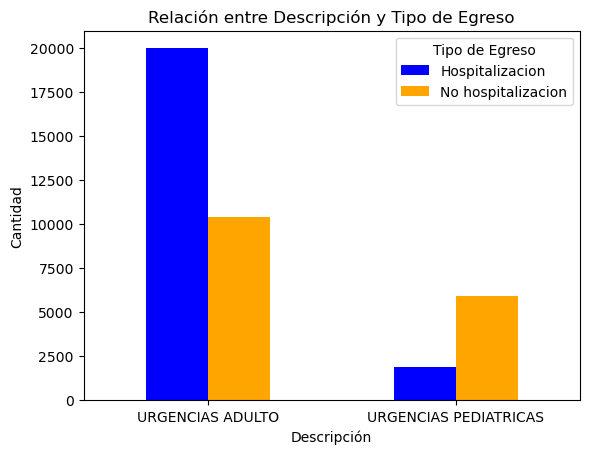

In [29]:
import matplotlib.pyplot as plt


conteo = df_5.groupby(['DESCRIPCION', 'Tipo Egreso (INTERNACION)']).size().unstack()
conteo.plot(kind='bar', color=['blue', 'orange'])
plt.title('Relación entre Descripción y Tipo de Egreso')
plt.xlabel('Descripción')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Egreso')

plt.show()


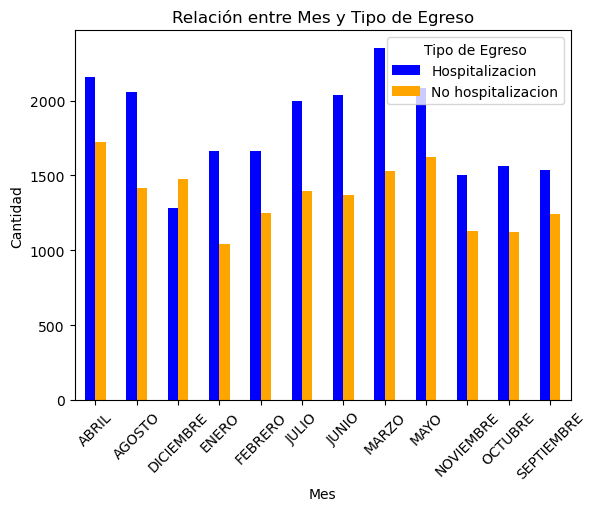

In [30]:
conteo_mes = df_5.groupby(['Mes', 'Tipo Egreso (INTERNACION)']).size().unstack()
conteo_mes.plot(kind='bar', color=['blue', 'orange'])
plt.title('Relación entre Mes y Tipo de Egreso')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Egreso')

plt.show()


In [31]:
2. #Comprobaré el segundo supuesto.
numero_valores_unicos_Natencion = df_5['Nro Atencion'].nunique()
print("Cantidad de valores unicos de la variable Nro Atencion: "+str(numero_valores_unicos_Natencion))

Cantidad de valores unicos de la variable Nro Atencion: 38224


El supuesto 1, a pesar que no se hizo un coeficiente de correlacion, se opta por eliminar la variable Paciente Tipo Identificacion debido a que se supone no aporta informacion relacionada con el resultado de si será internado o no, y que la información que aporta, es la misma que la otra variable.

El supuesto 2, se observa que la cantidad de valores unicos de la variable mencionada es casi exactamente igual al numero total de filas de la DB, excepto por un valor que se repite (el cual probablemente fue un error de digitacion ya que este valor no se debe repetir), por ende esta variables será eliminada.

Variables a eliminar hasta ahora: Nro Atencion, Paciente Tipo Identificacion.

Por otro lado, las tres variables siguientes corresponden a variables post, es decir tomadas despues de hospitalizacion o relacionadas de alguna manera con esta, por lo cual noserán usadas para el proceso de modelado, por ende, entran en el grupo de variables a eliminar:

Variables a eliminar hasta ahora: Nro Atencion, Paciente Tipo Identificacion, Servicio Admite, Servicio Anterior, Servicio Egreso.

SE PROCEDE CON EL ANALISIS DE LAS SIGUIENTES VARIABLES:

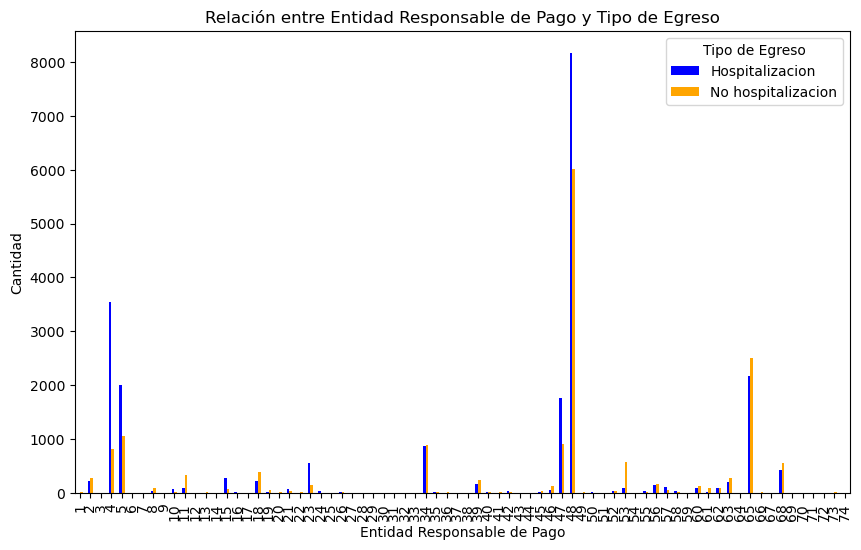

In [32]:
conteo_entidad_pago = df_5.groupby(['Paciente Entidad Responsable Pago', 'Tipo Egreso (INTERNACION)']).size().unstack()

conteo_entidad_pago.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
plt.title('Relación entre Entidad Responsable de Pago y Tipo de Egreso')
plt.xlabel('Entidad Responsable de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Egreso')


plt.show()


Vamos con la siguiente variables:
Paciente Modalidad Contrato.
Procedemos primero a verificar los valores unicos que este posee y la cantidad de estos:

In [34]:
elementos_unicos_ModContrato = df_5['Paciente Modalidad Contrato'].value_counts()
print("Elementos únicos en la variable 'Paciente Modalidad Contrato' y su cantidad:")
print(elementos_unicos_ModContrato)


Elementos únicos en la variable 'Paciente Modalidad Contrato' y su cantidad:
EVENTO    32459
PGP        5735
CAPITA       31
Name: Paciente Modalidad Contrato, dtype: int64


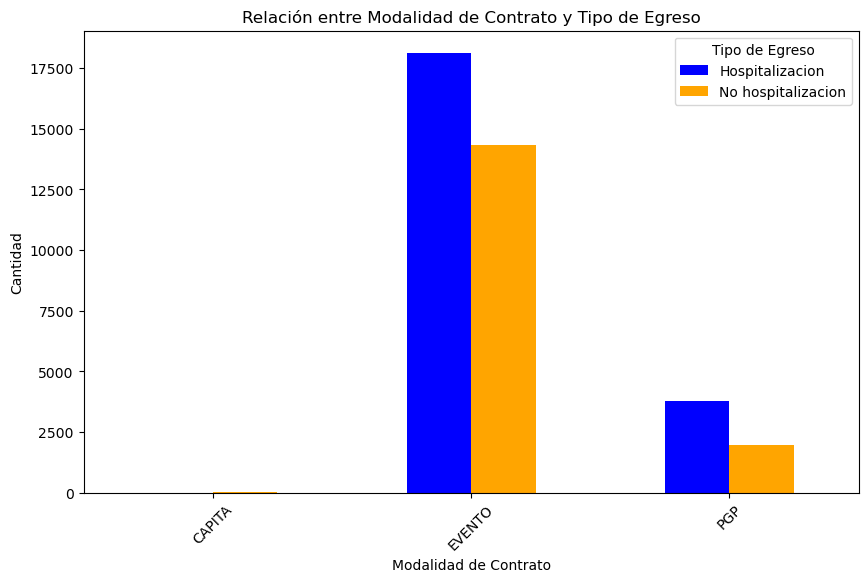

In [35]:
conteo_modalidad_contrato = df_5.groupby(['Paciente Modalidad Contrato', 'Tipo Egreso (INTERNACION)']).size().unstack()

conteo_modalidad_contrato.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))
plt.title('Relación entre Modalidad de Contrato y Tipo de Egreso')
plt.xlabel('Modalidad de Contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Egreso')

plt.show()


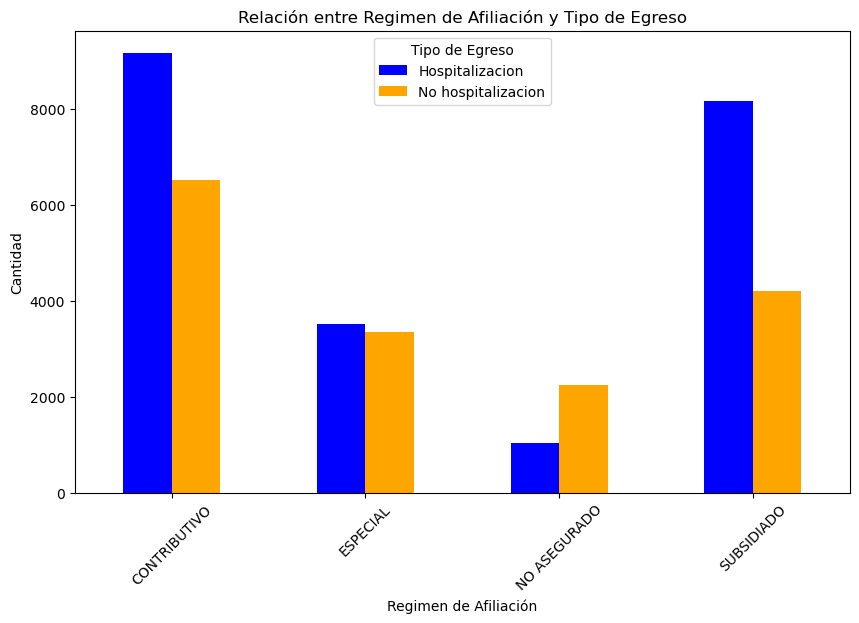

In [36]:
conteo_regimen_afiliacion = df_5.groupby(['Paciente Regimen Afiliacion', 'Tipo Egreso (INTERNACION)']).size().unstack()

conteo_regimen_afiliacion.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6))

plt.title('Relación entre Regimen de Afiliación y Tipo de Egreso')
plt.xlabel('Regimen de Afiliación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Egreso')

plt.show()


In [45]:

df_5[['Urg Fecha (Camara)', 'Nro Atencion']]



,Urg Fecha (Camara),Nro Atencion
1,2023-01-01 14:14:06.223000,354450470
2,2023-01-07 18:21:27.977000,4144136964
3,2023-01-11 11:19:16.737000,6090446598
4,2023-01-07 10:08:49.397000,3879330593
5,2023-01-01 19:55:33.970000,502678254
...,...,...
39740,17/12/2023 2:06:21,266200248216
39741,25/12/2023 9:16:35,271388292512
39742,29/12/2023 11:20:02,274133627340
39743,28/12/2023 8:35:43,273392596152


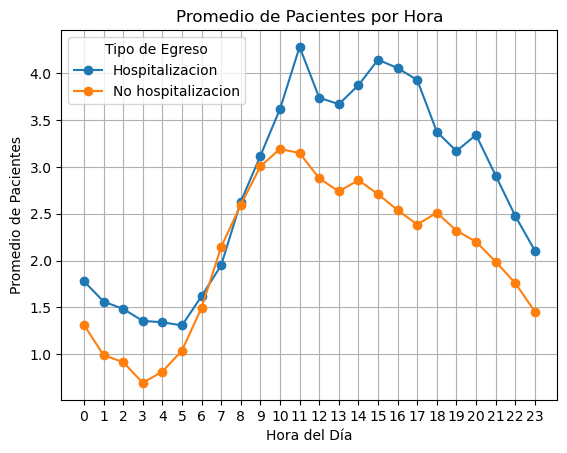

In [47]:

import matplotlib.pyplot as plt

# Convertir la columna urg fecha camara a formato de fecha y hora porque alguien por ahí la volvio str
df_5['Urg Fecha (Camara)'] = pd.to_datetime(df_5['Urg Fecha (Camara)'])
df_5['Hora'] = df_5['Urg Fecha (Camara)'].dt.hour
conteo_por_hora = df_5.groupby(['Hora', 'Tipo Egreso (INTERNACION)']).size().unstack().fillna(0) #se agrupa por hora y cuenta el número de pacientes hospitalizados y no hospitalizados
# Calcular el promedio 
# Contamos el número de días en que se registraron datos para cada hora
num_dias_por_hora = df_5.groupby('Hora').apply(lambda x: x['Urg Fecha (Camara)'].dt.date.nunique()) #esta linea la hizo chatgpt, pero esta mela
# Dividimos la sumatoria de pacientes por el número de días para obtener el promedio
promedio_por_hora = conteo_por_hora.div(num_dias_por_hora, axis=0)

#aqui para crear la grafica de lineas creo, no se chat gpt hizo esta parte que sigue
promedio_por_hora.plot(kind='line', marker='o')


plt.title('Promedio de Pacientes por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Pacientes')
plt.xticks(range(24)) 
plt.grid(True)
plt.legend(title='Tipo de Egreso')
plt.show()


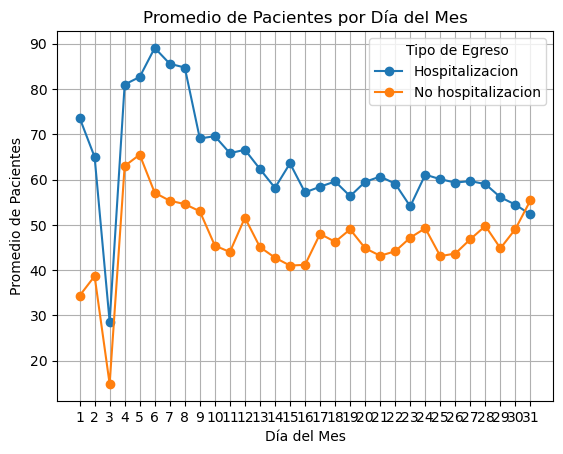

In [49]:

df_5['Urg Fecha (Camara)'] = pd.to_datetime(df_5['Urg Fecha (Camara)'])
df_5['Dia'] = df_5['Urg Fecha (Camara)'].dt.day

#se aagrupar por día del mes y se cuenta el número de pacientes hospitalizados y no hospitalizados
conteo_por_dia = df_5.groupby(['Dia', 'Tipo Egreso (INTERNACION)']).size().unstack().fillna(0)

# Calculamos el promedio de pacientes hospitalizados y no hospitalizados en cada día del mes
# lo mismo que el codigo de arriba
num_meses_por_dia = df_5.groupby('Dia').apply(lambda x: x['Urg Fecha (Camara)'].dt.month.nunique())
promedio_por_dia = conteo_por_dia.div(num_meses_por_dia, axis=0)


promedio_por_dia.plot(kind='line', marker='o')
plt.title('Promedio de Pacientes por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Promedio de Pacientes')
plt.xticks(range(1, 32))  # Mostrar todos los días del mes en el eje x
plt.grid(True)  # Habilitar cuadrícula
plt.legend(title='Tipo de Egreso')

plt.show()
